### Aula 7 - Web scrapping

In [4]:
import urllib
import requests
from bs4 import BeautifulSoup
# procurar Selenium tb
import nltk
import spacy

In [5]:
text_file = urllib.request.urlopen("https://edition.cnn.com/europe/live-news/russia-ukraine-war-news-09-05-22/index.html")

response = text_file.read()
soup = BeautifulSoup(response, 'html.parser')
text = soup.get_text()
text = text.lower()

In [40]:
soup

<!DOCTYPE html>
<html lang="en"><head><meta charset="utf-8"/><meta content="ie=edge" http-equiv="x-ua-compatible"/><meta content="width=device-width, initial-scale=1" name="viewport"/><link href="/cnn-live-story/static/favicon.ico" rel="shortcut icon" type="image/x-icon"/><title data-rh="true">September 5, 2022 Russia-Ukraine news</title><meta charset="utf-8" data-rh="true"/><meta content="width=device-width, initial-scale=1" data-rh="true" name="viewport"/><meta content="europe" data-rh="true" name="section"/><meta content='By &lt;a href="/profiles/aditi-sandal"&gt;Aditi Sangal&lt;/a&gt;, Amy Woodyatt, &lt;a href="/profiles/simone-mccarthy"&gt;Simone McCarthy&lt;/a&gt;, &lt;a href="/profiles/tara-subramaniam"&gt;Tara Subramaniam&lt;/a&gt; and Maureen Chowdhury, CNN' data-rh="true" name="author"/><meta content="europe, September 5, 2022 Russia-Ukraine news" data-rh="true" name="keywords"/><meta content="2022-09-05T07:16:30Z" data-rh="true" name="pubdate"/><meta content="2022-09-05T22:5

In [10]:
print(text[1400:2000])

made progress, with the military taking two settlements in the south and another in donetsk in the east. the last operating reactor at the zaporizhzhia nuclear power plant has disconnected from the ukrainian grid as a result of a fire caused by russian shelling, the country’s nuclear agency said monday. the development comes as two iaea inspectors remain at the plant as part of a un nuclear watchdog mission. plans to hold a referendum — criticized by us and ukrainian officials as a sham — for kherson region to join russia are on hold, a pro-russian official said. concerns are growing over ener


In [14]:
from nltk import word_tokenize
from nltk.corpus import stopwords

In [15]:
words = word_tokenize(text)

In [17]:
from nltk.stem.porter import *
import re

In [21]:
sw_english = set(stopwords.words('english'))
stemmer = PorterStemmer()

In [28]:
# Pré-processmaento dos tokens - tá na aula 3
def preprocessing(string):
    string = re.sub(r"[^a-zA-Z0-9]+", " ", string)
    string = string.lower()
    words = word_tokenize(string)
    filter_words = [word for word in words if word not in sw_english and len(word) <= 10]
    stem_words = []
    for word in filter_words:
        sw = stemmer.stem(word)
        stem_words.append(sw)
    return stem_words

In [29]:
text2 = preprocessing(text)

In [30]:
text2

['septemb',
 '5',
 '2022',
 'russia',
 'ukrain',
 'newsopen',
 'eastunit',
 'eastunit',
 'oleditionu',
 'eastunit',
 'kingdomu',
 'biden',
 'firstu',
 'tv',
 'digit',
 'studioscnn',
 'filmshlntv',
 'scheduletv',
 'show',
 'equalscal',
 'africa2',
 'degreescnn',
 'heroesal',
 'cnnfollow',
 'cnn',
 'septemb',
 '5',
 '2022',
 'russia',
 'ukrain',
 'newsbi',
 'aditi',
 'sangal',
 'ami',
 'woodyatt',
 'simon',
 'mccarthi',
 'tara',
 'maureen',
 'chowdhuri',
 'cnnupdat',
 '2259',
 'gmt',
 '0659',
 'hkt',
 'septemb',
 '5',
 '2022what',
 'cover',
 'volodymyr',
 'zelenski',
 'say',
 'ukrainian',
 'offens',
 'made',
 'progress',
 'militari',
 'take',
 'two',
 'south',
 'anoth',
 'donetsk',
 'east',
 'last',
 'oper',
 'reactor',
 'nuclear',
 'power',
 'plant',
 'ukrainian',
 'grid',
 'result',
 'fire',
 'caus',
 'russian',
 'shell',
 'countri',
 'nuclear',
 'agenc',
 'said',
 'monday',
 'come',
 'two',
 'iaea',
 'inspector',
 'remain',
 'plant',
 'part',
 'un',
 'nuclear',
 'watchdog',
 'mission'

In [31]:
text3 = " ".join(text2)

In [34]:
from nltk.probability import FreqDist
import matplotlib.pyplot as plt

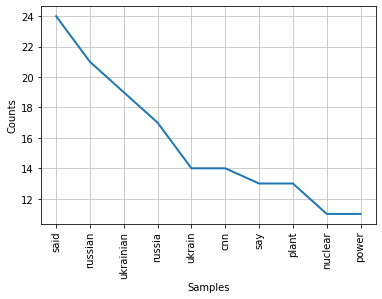

In [36]:
fdist = FreqDist(text2)
fdist.plot(10)
plt.show()